Numerical Methods RK 

# Explicite euler

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import numerik_functions as nf






# Euler implizite

Implizite => Steigung ist nicht als Funktion gegeben sondern wird Implizit über die Gleichung definiert

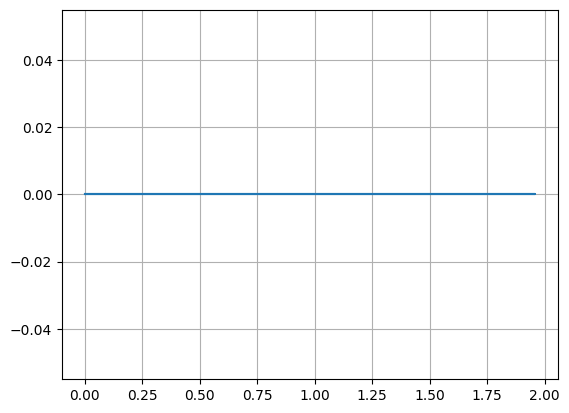

In [28]:
def newton_implizitEuler(xend,x0,y0,n,tol):
     
    
    h= (xend-x0)/n
    def f (x,y):
        return -4*y
    def df(x,y):
        return -4
   
    x = np.zeros(n)
    y = np.zeros(n)
    k=f(x0,y0)



    for i in range(1,n-1):
        x[i]= x[i-1]+h
        r = k-f(x[i-1]+h,y[i-1]+h*k)

        while np.abs(r) > tol:
            j = df(x[i-1]+h,y[i-1]+h*k)
            delta_k = -r/(1-h*j)
            k = k+delta_k
            r = k-f(x[i-1]+h,y[i-1]+h*k)

        y[i]=y[i-1]+h*k



    return x,y

x,y = newton_implizitEuler(2,0,1,100,1e-6)

plt.plot(x,y)
plt.grid()
plt.show()



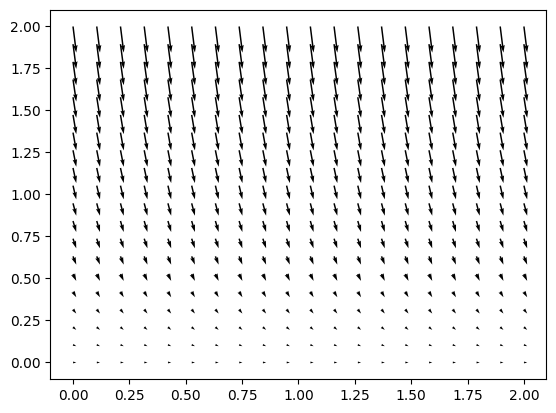

In [34]:
# Field of direction

x,y=np.meshgrid(np.linspace(0,2,20),np.linspace(0,2,20))

plt.quiver(x,y,1,-4*y)
plt.show()

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_11768\1546012083.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.quiver(x,y,1,-x**2/(y))
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_11768\1546012083.py:5: RuntimeWarning: invalid value encountered in divide
  plt.quiver(x,y,1,-x**2/(y))


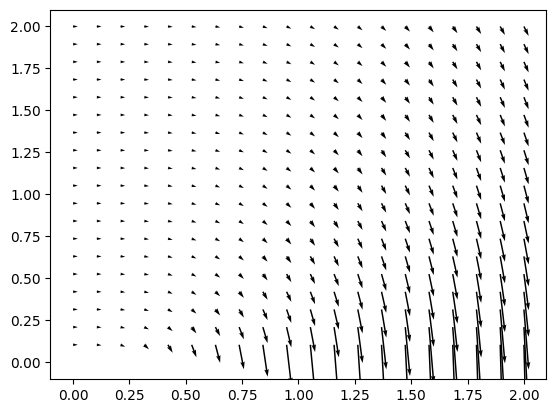

In [35]:
# Field of direction

x,y=np.meshgrid(np.linspace(0,2,20),np.linspace(0,2,20))

plt.quiver(x,y,1,-x**2/(y))

plt.show()